In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
# Load the dataset
file_path = "/media/Cleaned_Insurance_Churn_Dataset.csv"
data = pd.read_csv(file_path)

<ipython-input-5-3508a607e598>:3: DtypeWarning: Columns (9,46) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Top Positive Correlations with Churn:
Churn                            1.000000
PaymentsMissed                   0.808130
CustomerComplaints               0.735382
LatePayments                     0.418907
PagesVisited                     0.021890
SupportInteraction               0.019835
AverageSessionDurationMinutes    0.014037
CustomerID                       0.012835
StepsCompleted                   0.004965
ReferralBonusUsed                0.003695
FeatureAdoptionRate              0.003690
ClaimProcessingTime              0.003668
Name: Churn, dtype: float64

Top Negative Correlations with Churn:
NotificationsOptIn          -0.000423
SessionsPerWeek             -0.000451
SearchQueries               -0.008724
TrialPeriodDays             -0.011663
Age                         -0.013012
ClaimsFiled                 -0.013056
PolicyRenewed               -0.014258
CTAClicked                  -0.016306
AppVersion                  -0.018085
OnboardingDurationMinutes   -0.043518
OnboardingC

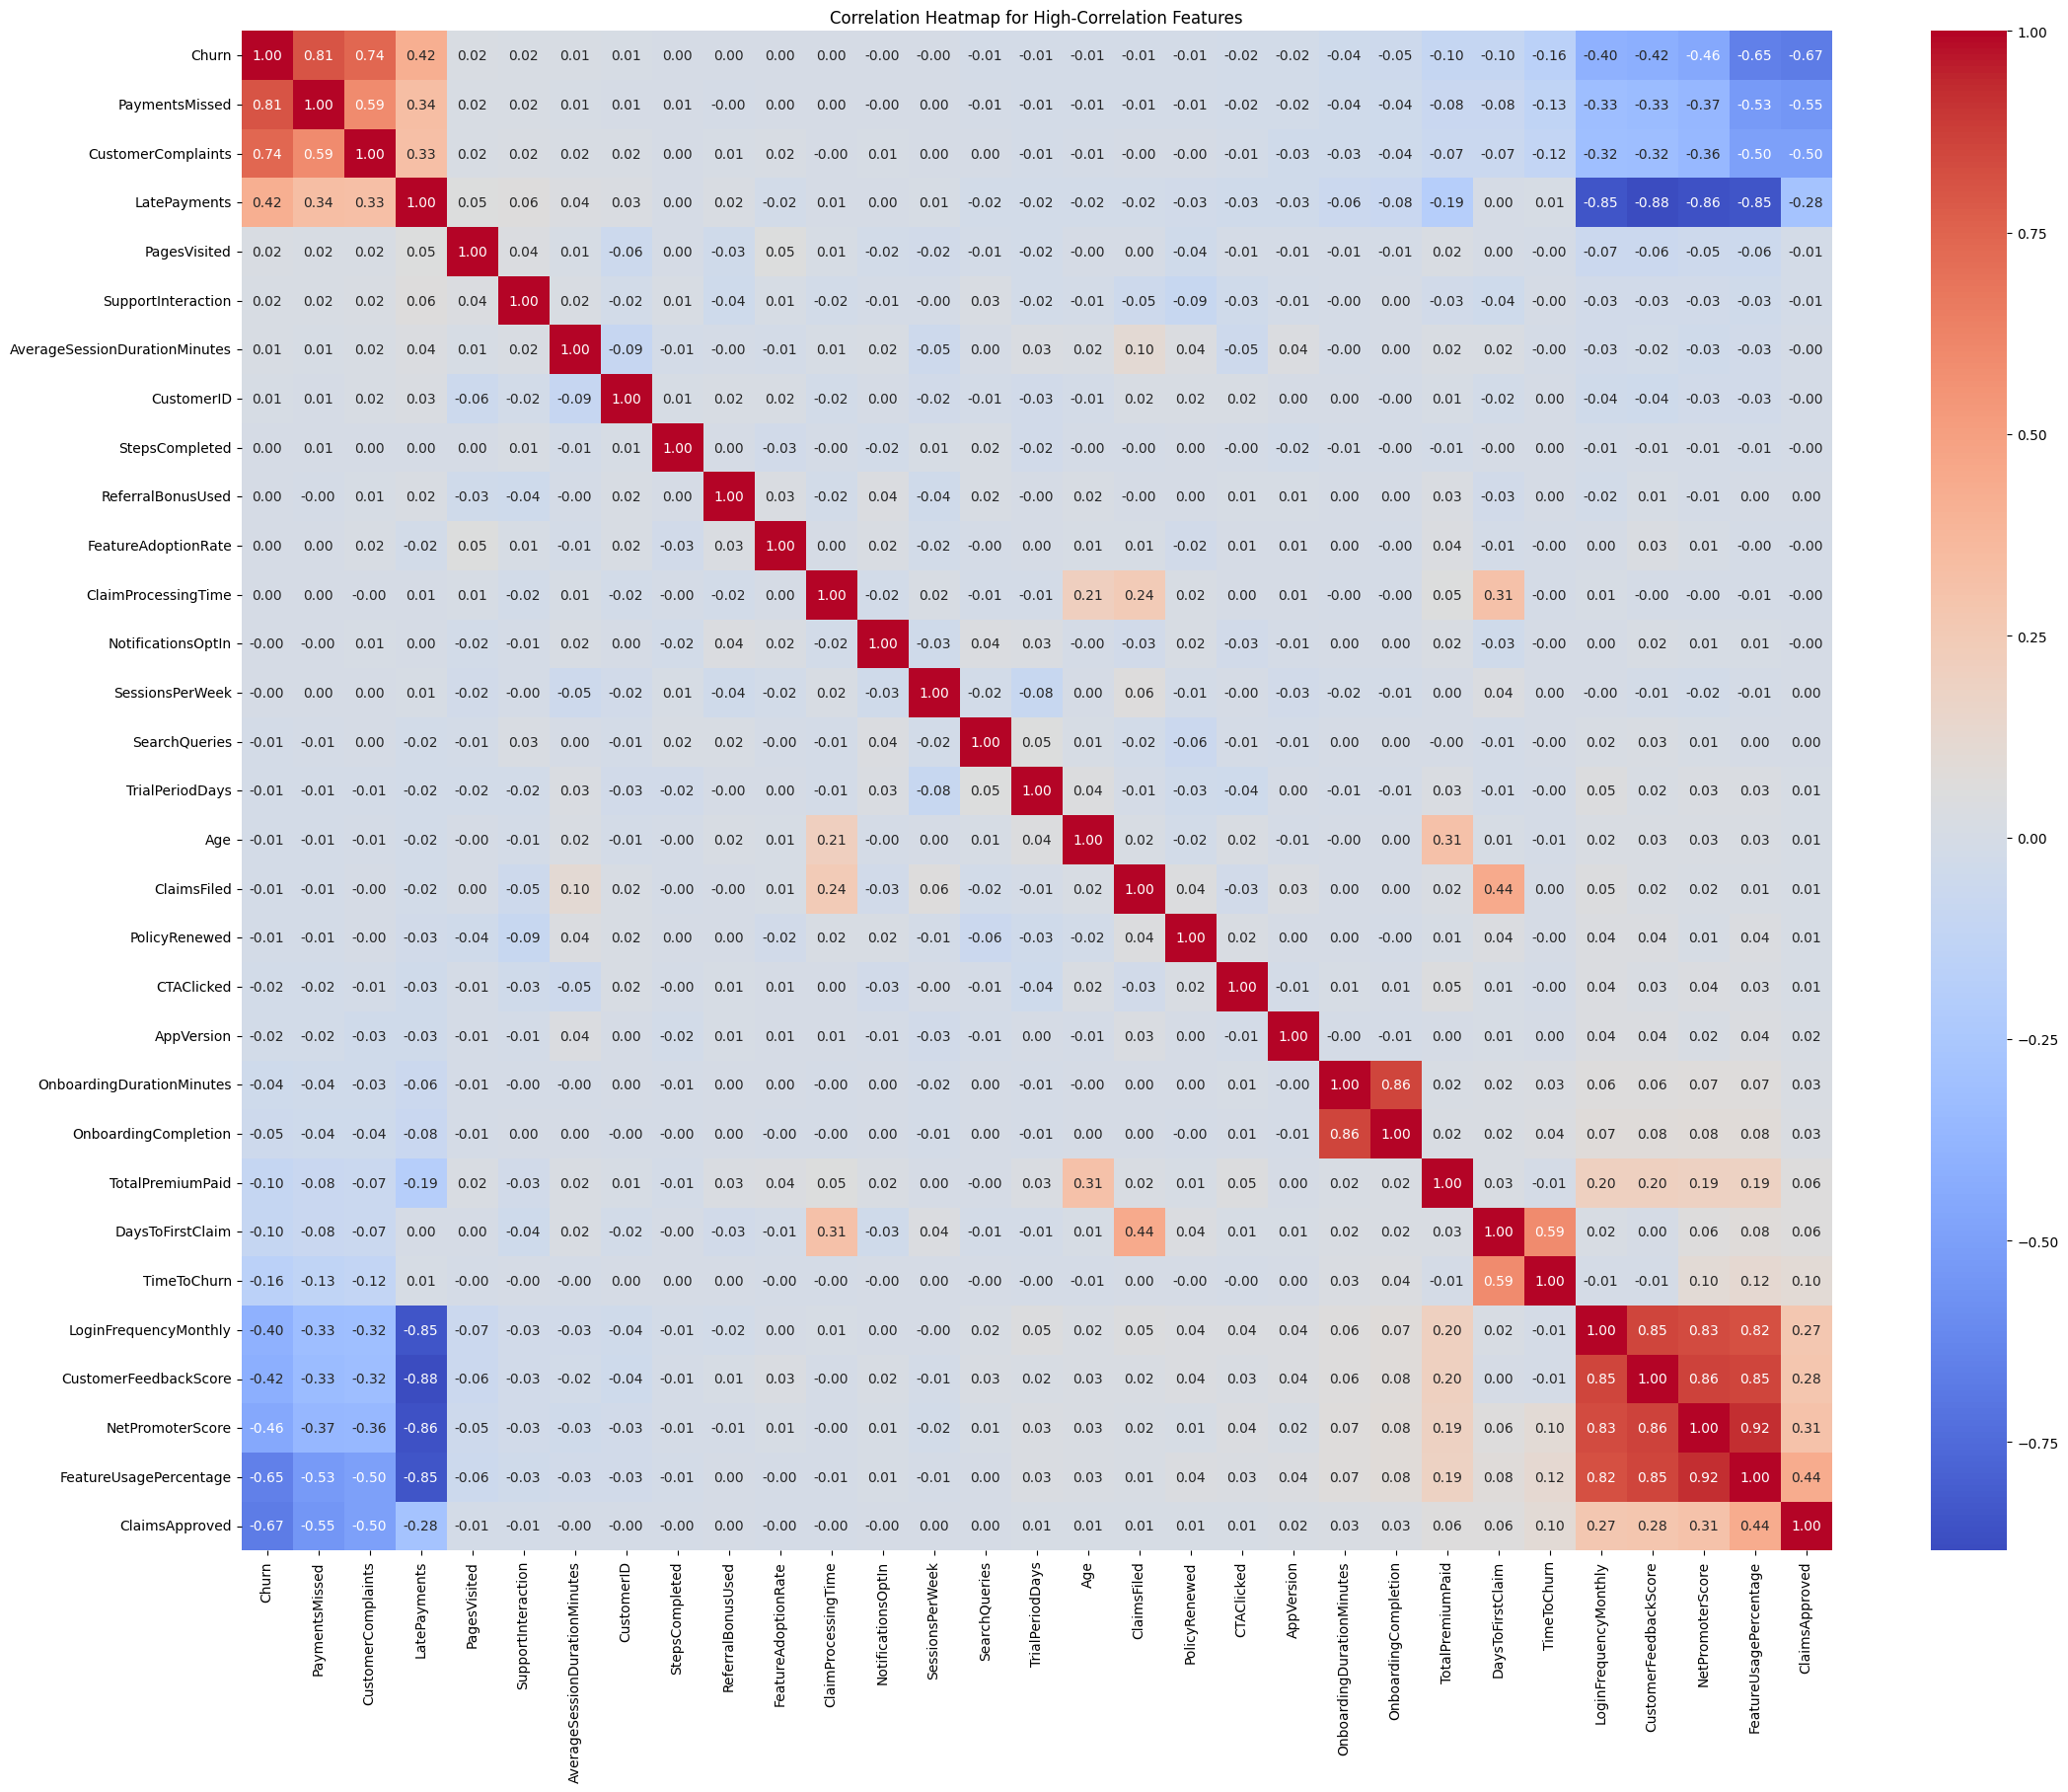

In [6]:
def overall_correlation_heat_map():
    # Select numerical columns
    numerical_data = data.select_dtypes(include=['int64', 'float64'])

    # Compute the correlation matrix
    correlation_matrix = numerical_data.corr()

    # Extract correlations with 'Churn'
    churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

    # Print the sorted correlations
    print("Top Positive Correlations with Churn:")
    print(churn_correlation[churn_correlation > 0].head(30))

    print("\nTop Negative Correlations with Churn:")
    print(churn_correlation[churn_correlation < 0].tail(30))

    # Visualize correlations with 'Churn'
    high_corr_features = churn_correlation[abs(churn_correlation) > 0.0].index

    # Create a heatmap for high correlation features
    plt.figure(figsize=(26, 20))
    high_corr_matrix = numerical_data[high_corr_features].corr()
    sns.heatmap(high_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap for High-Correlation Features")
    plt.show()
    # code descriptions done with chatgpt (ChatGPT, 2024)

overall_correlation_heat_map()

Correlation Matrix for Customers Who Have Churned:
                               CustomerID       Age  PolicyRenewed  Churn  \
CustomerID                       1.000000 -0.040861       0.052986    NaN   
Age                             -0.040861  1.000000       0.029019    NaN   
PolicyRenewed                    0.052986  0.029019       1.000000    NaN   
Churn                                 NaN       NaN            NaN    NaN   
TimeToChurn                      0.030594 -0.018357       0.003110    NaN   
LoginFrequencyMonthly           -0.064919  0.005114       0.000850    NaN   
FeatureUsagePercentage           0.001146 -0.011373       0.010834    NaN   
AverageSessionDurationMinutes   -0.095979  0.050657       0.066795    NaN   
PagesVisited                    -0.035146 -0.004864      -0.036589    NaN   
CTAClicked                      -0.028043  0.046388       0.085098    NaN   
FeatureAdoptionRate             -0.000277  0.006862      -0.009694    NaN   
CustomerFeedbackScore    

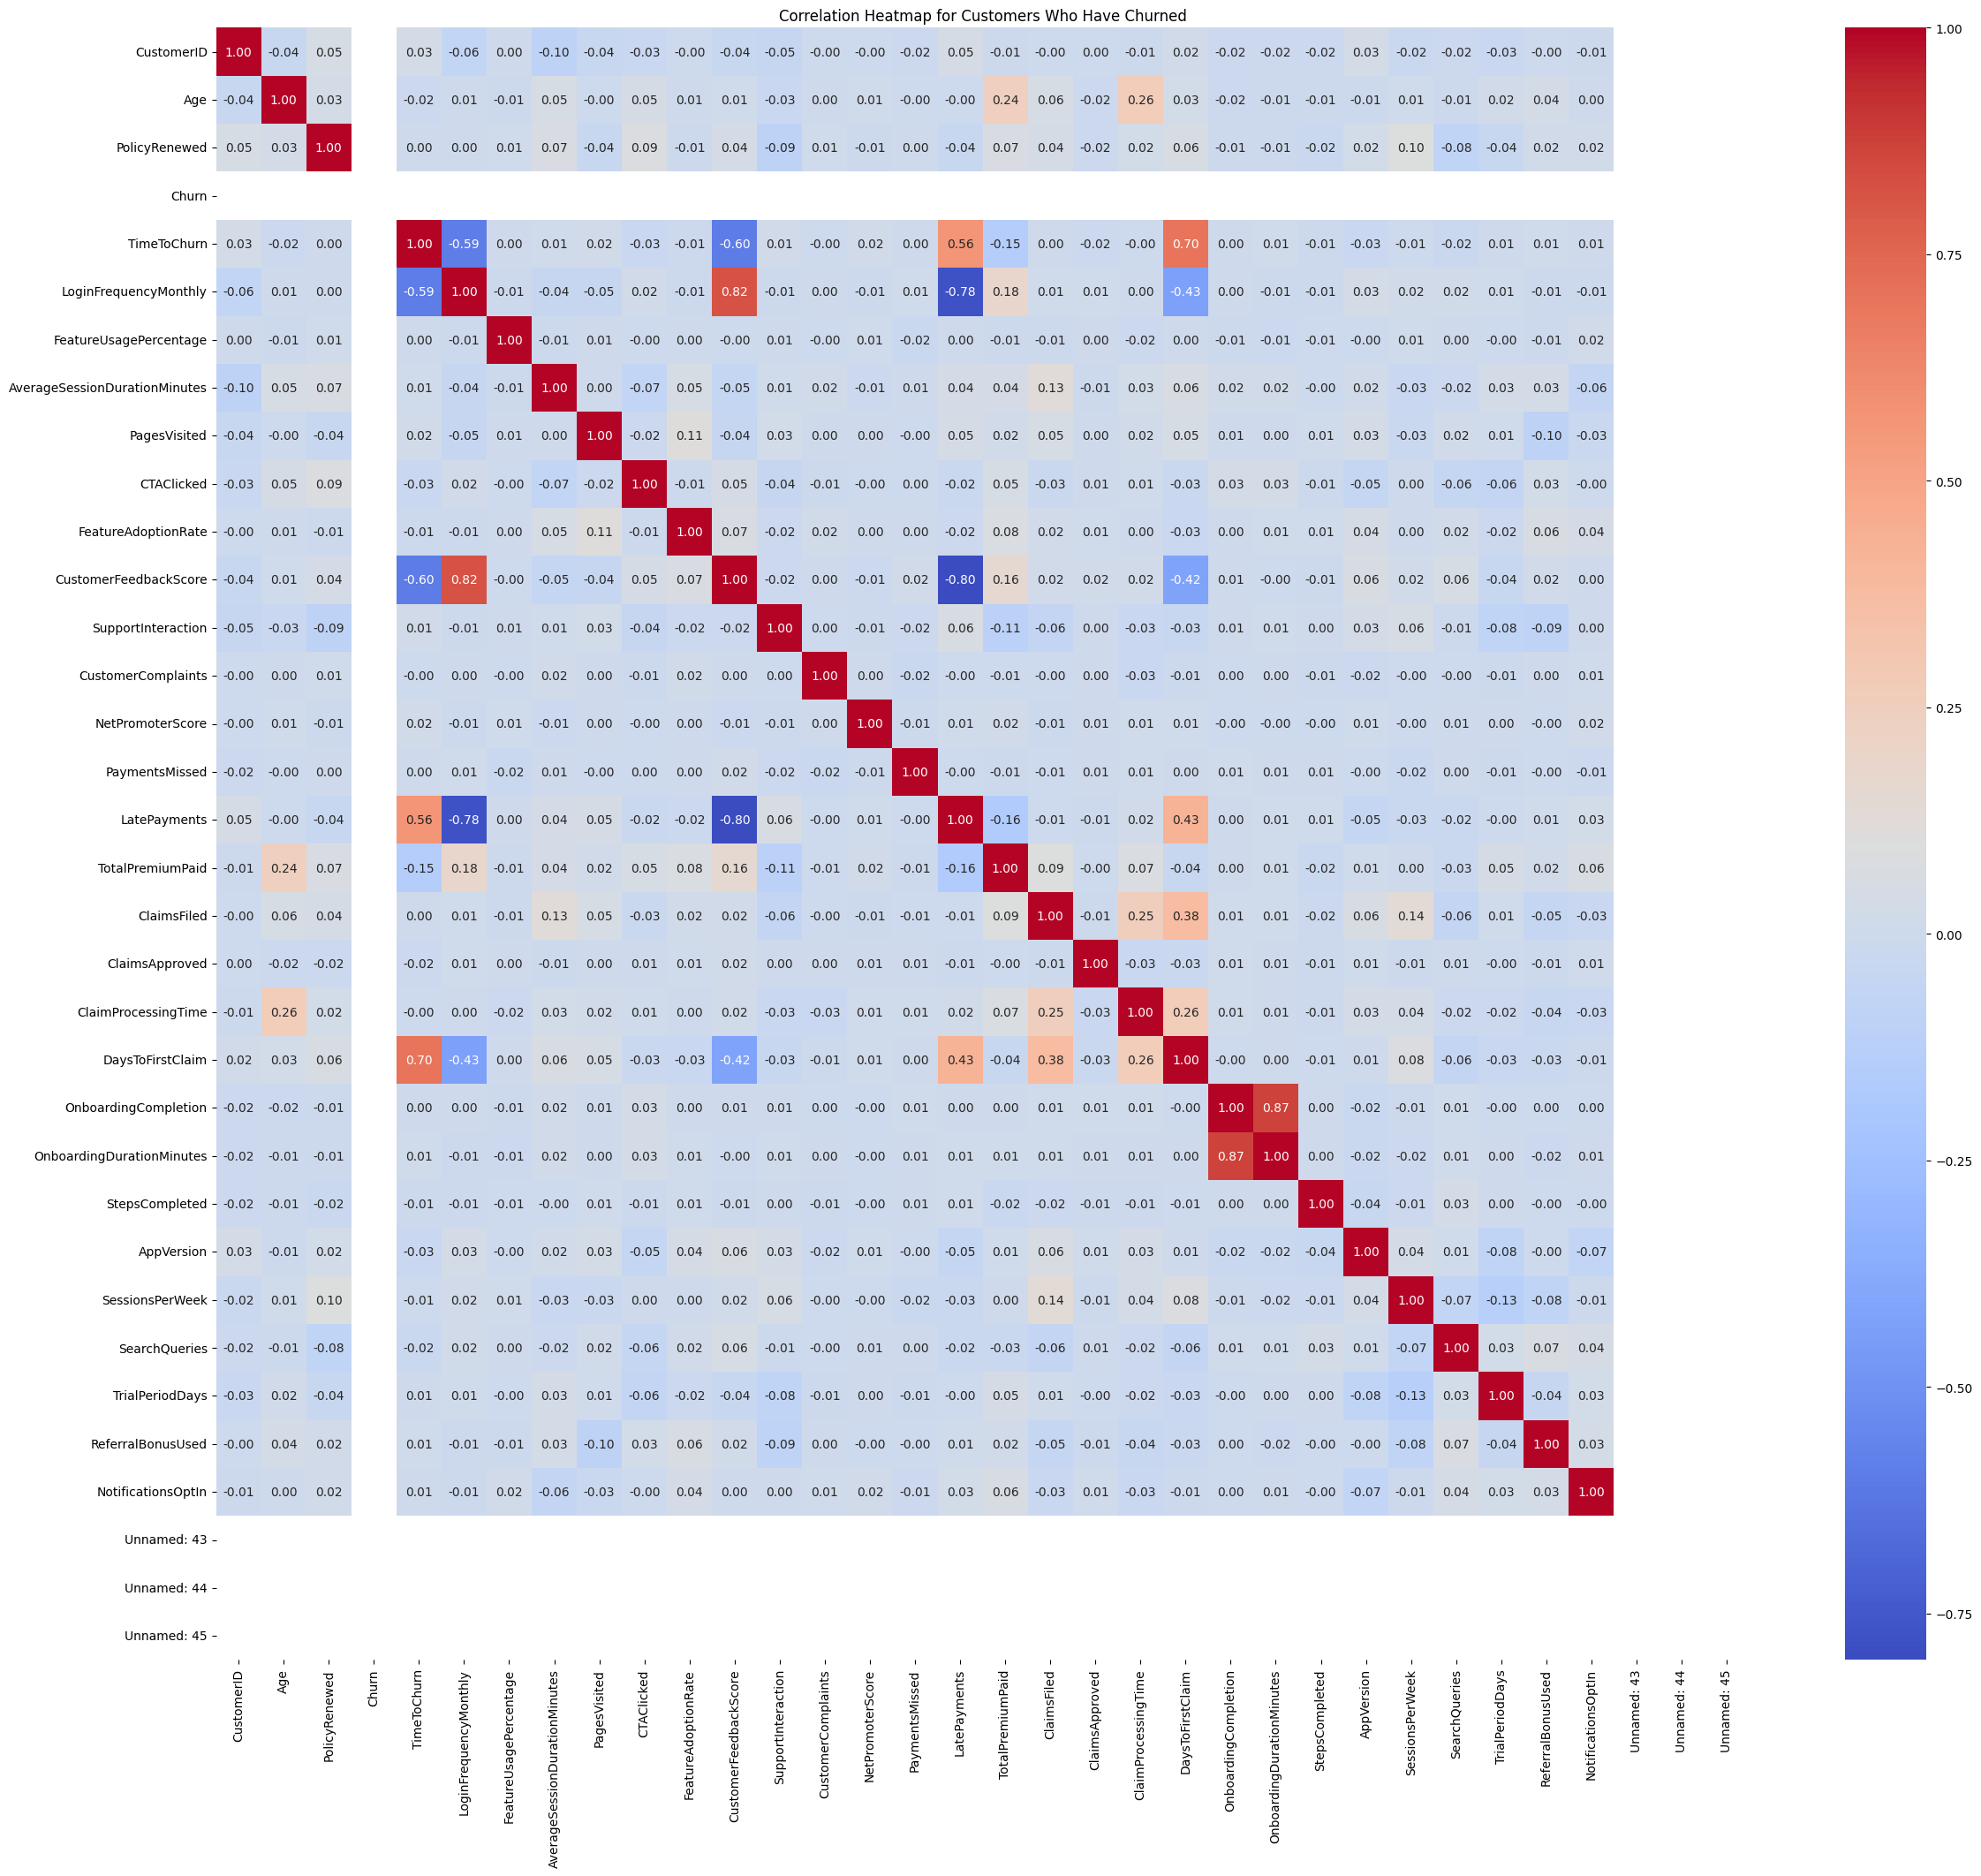

,CustomerID,Age,PolicyRenewed,Churn,TimeToChurn,LoginFrequencyMonthly,FeatureUsagePercentage,AverageSessionDurationMinutes,PagesVisited,CTAClicked,...,StepsCompleted,AppVersion,SessionsPerWeek,SearchQueries,TrialPeriodDays,ReferralBonusUsed,NotificationsOptIn,Unnamed: 43,Unnamed: 44,Unnamed: 45
CustomerID,1.000000,-0.040861,0.052986,NaN,0.030594,-0.064919,0.001146,-0.095979,-0.035146,-0.028043,...,-0.016737,0.034247,-0.024595,-0.018631,-0.031128,-0.002476,-0.009328,NaN,NaN,NaN
Age,-0.040861,1.000000,0.029019,NaN,-0.018357,0.005114,-0.011373,0.050657,-0.004864,0.046388,...,-0.013266,-0.011504,0.010651,-0.006810,0.017467,0.035803,0.001599,NaN,NaN,NaN
PolicyRenewed,0.052986,0.029019,1.000000,NaN,0.003110,0.000850,0.010834,0.066795,-0.036589,0.085098,...,-0.023451,0.024139,0.096328,-0.079773,-0.035801,0.017083,0.015208,NaN,NaN,NaN
Churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeToChurn,0.030594,-0.018357,0.003110,NaN,1.000000,-0.593519,0.001422,0.009225,0.020724,-0.033033,...,-0.009557,-0.029228,-0.005969,-0.021200,0.005432,0.012250,0.007607,NaN,NaN,NaN
LoginFrequencyMonthly,-0.064919,0.005114,0.000850,NaN,-0.593519,1.000000,-0.012001,-0.041898,-0.048302,0.017557,...,-0.009686,0.031296,0.015286,0.018479,0.014438,-0.010115,-0.010239,NaN,NaN,NaN
FeatureUsagePercentage,0.001146,-0.011373,0.010834,NaN,0.001422,-0.012001,1.000000,-0.012707,0.005929,-0.001929,...,-0.005635,-0.002537,0.011803,0.003986,-0.001370,-0.010765,0.016343,NaN,NaN,NaN
AverageSessionDurationMinutes,-0.095979,0.050657,0.066795,NaN,0.009225,-0.041898,-0.012707,1.000000,0.002840,-0.067127,...,-0.000772,0.015931,-0.027485,-0.016061,0.032511,0.029912,-0.060377,NaN,NaN,NaN
PagesVisited,-0.035146,-0.004864,-0.036589,NaN,0.020724,-0.048302,0.005929,0.002840,1.000000,-0.019889,...,0.008463,0.030419,-0.026171,0.020379,0.011425,-0.095061,-0.026273,NaN,NaN,NaN
CTAClicked,-0.028043,0.046388,0.085098,NaN,-0.033033,0.017557,-0.001929,-0.067127,-0.019889,1.000000,...,-0.010056,-0.052404,0.002086,-0.055228,-0.061386,0.026598,-0.001081,NaN,NaN,NaN


In [7]:
def churned_correlation_heat_map():
    """
    Generate and display a correlation heatmap for customers who have churned.
    """
    churned_data = data[data['Churn'] == 1]
    numerical_data = churned_data.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numerical_data.corr()

    print("Correlation Matrix for Customers Who Have Churned:")
    print(correlation_matrix)

    plt.figure(figsize=(28, 24))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap for Customers Who Have Churned")
    plt.show()

    return correlation_matrix
    # code descriptions done with (ChatGPT, 2024)
churned_correlation_heat_map()

Correlation Matrix for Customers Who Have Not Churned:
                               CustomerID       Age  PolicyRenewed  Churn  \
CustomerID                       1.000000 -0.009038       0.012895    NaN   
Age                             -0.009038  1.000000      -0.025653    NaN   
PolicyRenewed                    0.012895 -0.025653       1.000000    NaN   
Churn                                 NaN       NaN            NaN    NaN   
TimeToChurn                     -0.001695 -0.005445      -0.004059    NaN   
LoginFrequencyMonthly           -0.031441  0.021323       0.039921    NaN   
FeatureUsagePercentage          -0.026335  0.026883       0.044978    NaN   
AverageSessionDurationMinutes   -0.092695  0.016205       0.035775    NaN   
PagesVisited                    -0.060595  0.001197      -0.036662    NaN   
CTAClicked                       0.026152  0.018924       0.012976    NaN   
FeatureAdoptionRate              0.022411  0.008766      -0.026723    NaN   
CustomerFeedbackScore

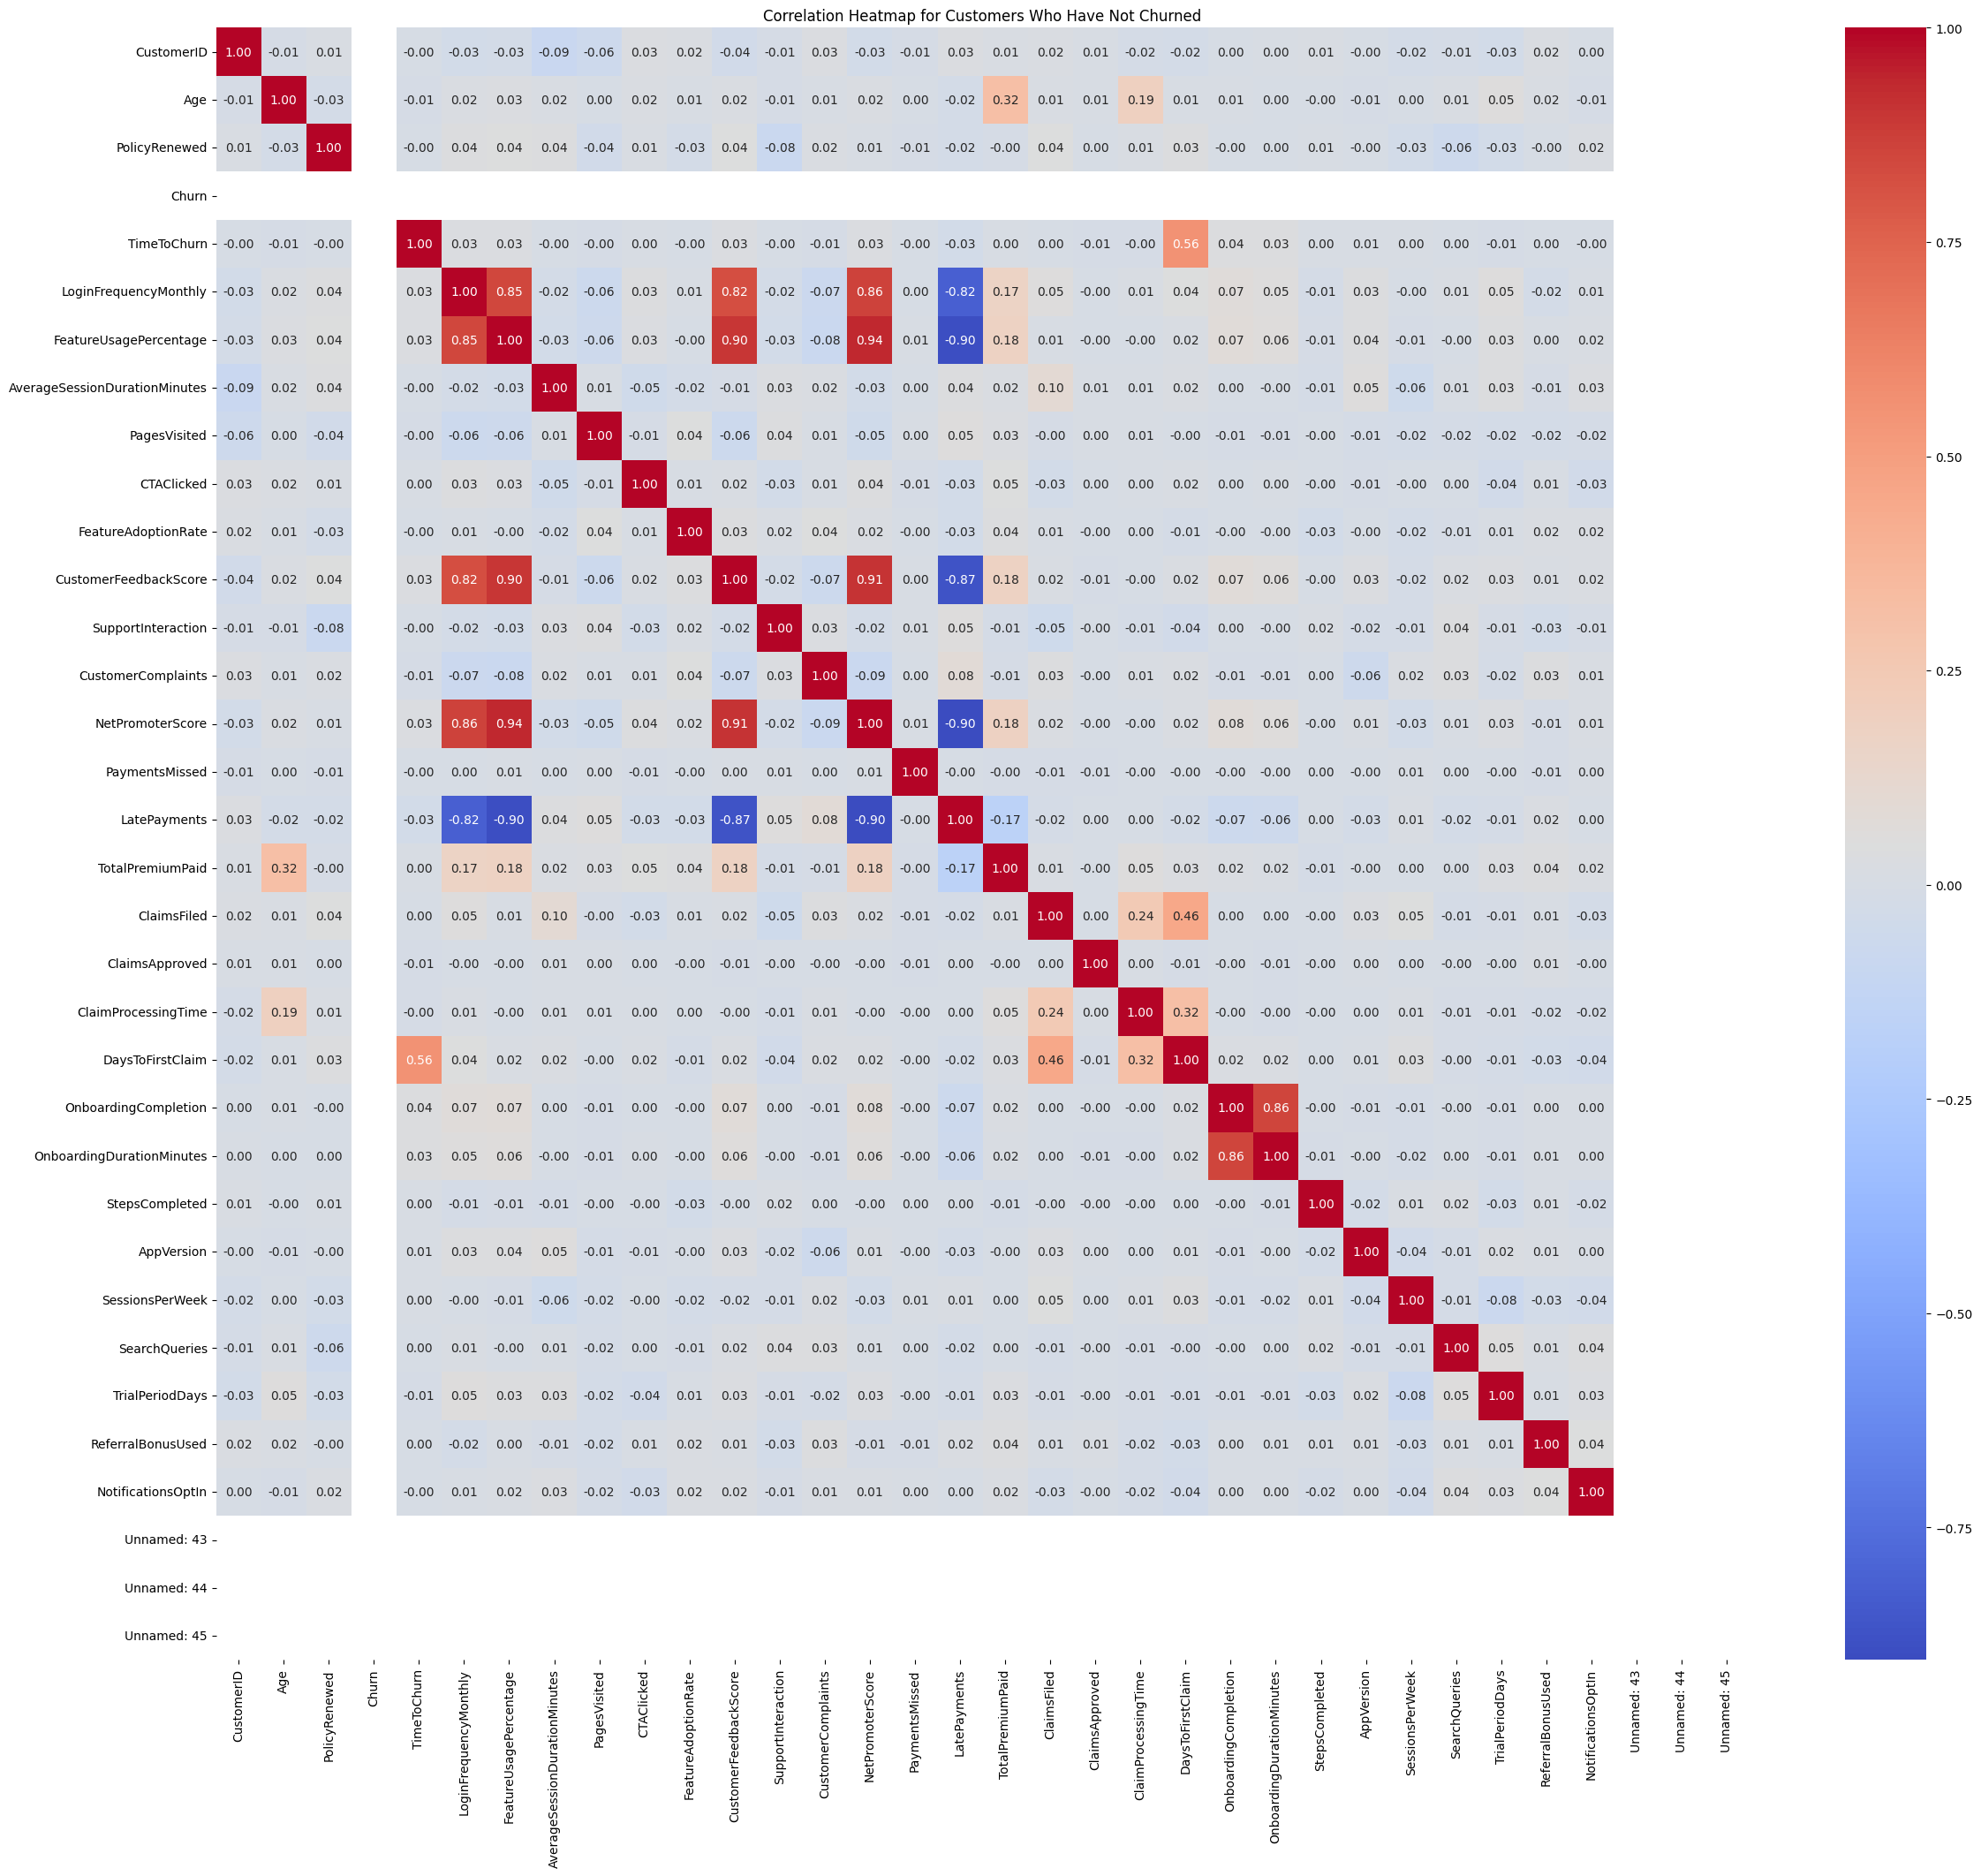

,CustomerID,Age,PolicyRenewed,Churn,TimeToChurn,LoginFrequencyMonthly,FeatureUsagePercentage,AverageSessionDurationMinutes,PagesVisited,CTAClicked,...,StepsCompleted,AppVersion,SessionsPerWeek,SearchQueries,TrialPeriodDays,ReferralBonusUsed,NotificationsOptIn,Unnamed: 43,Unnamed: 44,Unnamed: 45
CustomerID,1.000000,-0.009038,0.012895,NaN,-0.001695,-0.031441,-0.026335,-0.092695,-0.060595,0.026152,...,0.014265,-0.001685,-0.023794,-0.013642,-0.028376,0.022554,0.002627,NaN,NaN,NaN
Age,-0.009038,1.000000,-0.025653,NaN,-0.005445,0.021323,0.026883,0.016205,0.001197,0.018924,...,-0.000550,-0.005193,0.001428,0.011832,0.049410,0.015078,-0.006169,NaN,NaN,NaN
PolicyRenewed,0.012895,-0.025653,1.000000,NaN,-0.004059,0.039921,0.044978,0.035775,-0.036662,0.012976,...,0.005530,-0.001107,-0.033051,-0.060687,-0.033971,-0.001759,0.021624,NaN,NaN,NaN
Churn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TimeToChurn,-0.001695,-0.005445,-0.004059,NaN,1.000000,0.027417,0.026931,-0.002904,-0.004473,0.003165,...,0.003979,0.007187,0.003313,0.002053,-0.009141,0.001178,-0.002001,NaN,NaN,NaN
LoginFrequencyMonthly,-0.031441,0.021323,0.039921,NaN,0.027417,1.000000,0.848624,-0.020520,-0.064161,0.034930,...,-0.013708,0.033760,-0.002764,0.012862,0.049567,-0.021637,0.007263,NaN,NaN,NaN
FeatureUsagePercentage,-0.026335,0.026883,0.044978,NaN,0.026931,0.848624,1.000000,-0.028746,-0.059658,0.030196,...,-0.010749,0.036283,-0.009310,-0.002871,0.033090,0.004487,0.016369,NaN,NaN,NaN
AverageSessionDurationMinutes,-0.092695,0.016205,0.035775,NaN,-0.002904,-0.020520,-0.028746,1.000000,0.009174,-0.045710,...,-0.014043,0.047739,-0.055725,0.008524,0.033539,-0.007549,0.031515,NaN,NaN,NaN
PagesVisited,-0.060595,0.001197,-0.036662,NaN,-0.004473,-0.064161,-0.059658,0.009174,1.000000,-0.005555,...,-0.000082,-0.014355,-0.024722,-0.017201,-0.022345,-0.023311,-0.015136,NaN,NaN,NaN
CTAClicked,0.026152,0.018924,0.012976,NaN,0.003165,0.034930,0.030196,-0.045710,-0.005555,1.000000,...,-0.001521,-0.005698,-0.000421,0.000903,-0.038077,0.010104,-0.034660,NaN,NaN,NaN


In [8]:
def nonchurn_correlation_heat_map():
    """
    Generate and display a correlation heatmap for customers who have not churned.
    """
    nonchurned_data = data[data['Churn'] == 0]
    numerical_data = nonchurned_data.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numerical_data.corr()

    print("Correlation Matrix for Customers Who Have Not Churned:")
    print(correlation_matrix)

    plt.figure(figsize=(28, 24))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation Heatmap for Customers Who Have Not Churned")
    plt.show()

    return correlation_matrix
    # code descriptions done with (ChatGPT, 2024)
nonchurn_correlation_heat_map()

Correlation Matrix for Churned Customers:
                               CustomerID       Age  PolicyRenewed  Churn  \
CustomerID                       1.000000 -0.040861       0.052986    NaN   
Age                             -0.040861  1.000000       0.029019    NaN   
PolicyRenewed                    0.052986  0.029019       1.000000    NaN   
Churn                                 NaN       NaN            NaN    NaN   
TimeToChurn                      0.030594 -0.018357       0.003110    NaN   
LoginFrequencyMonthly           -0.064919  0.005114       0.000850    NaN   
FeatureUsagePercentage           0.001146 -0.011373       0.010834    NaN   
AverageSessionDurationMinutes   -0.095979  0.050657       0.066795    NaN   
PagesVisited                    -0.035146 -0.004864      -0.036589    NaN   
CTAClicked                      -0.028043  0.046388       0.085098    NaN   
FeatureAdoptionRate             -0.000277  0.006862      -0.009694    NaN   
CustomerFeedbackScore           -0

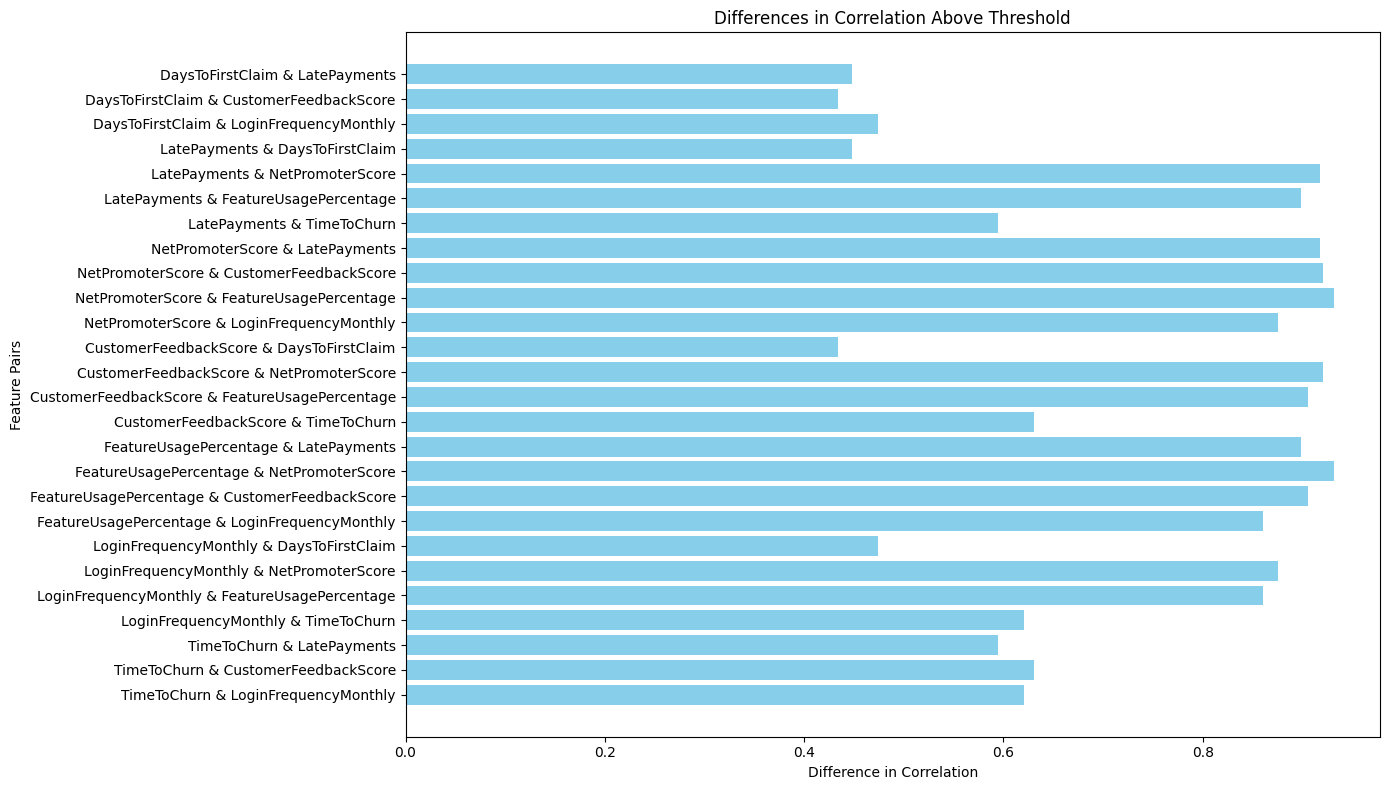

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def correlation_heat_map(data, churn_status):
    filtered_data = data[data['Churn'] == churn_status]
    numerical_data = filtered_data.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numerical_data.corr()
    print(f"Correlation Matrix for {'Non-Churned' if churn_status == 0 else 'Churned'} Customers:")
    print(correlation_matrix)
    return correlation_matrix

def compare_all_correlations_and_visualize(corr1, corr2, threshold=0.4):
    differences = []
    feature_pairs = []
    for feature1 in corr1.index:
        for feature2 in corr1.columns:
            if feature1 in corr2.index and feature2 in corr2.columns:
                correlation_churned = corr1.loc[feature1, feature2]
                correlation_non_churned = corr2.loc[feature1, feature2]
                difference = abs(correlation_churned - correlation_non_churned)
                if difference > threshold:
                    print(f"Features: {feature1} and {feature2}")
                    print(f"Correlation for churned customers: {correlation_churned}")
                    print(f"Correlation for non-churned customers: {correlation_non_churned}")
                    print(f"Difference in correlation: {difference}\n")
                    feature_pairs.append(f"{feature1} & {feature2}")
                    differences.append(difference)
    if differences:
        plt.figure(figsize=(14, 8))
        plt.barh(feature_pairs, differences, color='skyblue')
        plt.xlabel('Difference in Correlation')
        plt.ylabel('Feature Pairs')
        plt.title('Differences in Correlation Above Threshold')
        plt.tight_layout()
        plt.show()

# Assume 'data' is your DataFrame loaded here with proper columns, including 'Churn'
# Generate correlation matrices
churned_corr = correlation_heat_map(data, 1)
non_churned_corr = correlation_heat_map(data, 0)

# Visualize differences
compare_all_correlations_and_visualize(non_churned_corr, churned_corr, threshold=0.4)


In [10]:
def t_test():
    # Use all numerical columns for t-test
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    # Separate churned and non-churned customers
    churned_data = data[data['Churn'] == 1]
    non_churned_data = data[data['Churn'] == 0]

    # Perform t-tests between churned and non-churned customers for each numerical column
    def perform_t_tests(churned, non_churned, columns):
        t_test_results = []

        for column in columns:
            if column in churned.columns and column in non_churned.columns:
                churned_values = churned[column].dropna()
                non_churned_values = non_churned[column].dropna()

                t_stat, p_value = ttest_ind(churned_values, non_churned_values, equal_var=False)

                t_test_results.append({
                    'Feature': column,
                    't-statistic': t_stat,
                    'p-value': p_value
                })

        return pd.DataFrame(t_test_results)

    # Get t-test results
    t_test_results = perform_t_tests(churned_data, non_churned_data, numerical_columns)

    # Display the results
    def display_t_test_results(results):
        print("T-Test Results Between Churned and Non-Churned Customers:\n")
        print(results)

        # Highlight features with significant differences
        significant_results = results[results['p-value'] < 0.05]
        print("\nFeatures with Significant Differences (p-value < 0.05):\n")
        print(significant_results)

    # Display the results
    display_t_test_results(t_test_results)
    # code descriptions done with chatgpt (ChatGPT, 2024)

t_test()

T-Test Results Between Churned and Non-Churned Customers:

                          Feature  t-statistic        p-value
0                      CustomerID     3.008527   2.630930e-03
1                             Age    -2.982765   2.862758e-03
2                   PolicyRenewed    -3.304352   9.549393e-04
3                           Churn          inf   0.000000e+00
4                     TimeToChurn   -29.811688  4.769292e-187
5           LoginFrequencyMonthly  -114.756980   0.000000e+00
6          FeatureUsagePercentage  -480.701251   0.000000e+00
7   AverageSessionDurationMinutes     3.303421   9.580743e-04
8                    PagesVisited     5.050545   4.474860e-07
9                      CTAClicked    -3.777100   1.594832e-04
10            FeatureAdoptionRate     0.861468   3.889987e-01
11          CustomerFeedbackScore  -116.162120   0.000000e+00
12             SupportInteraction     4.715927   2.434456e-06
13             CustomerComplaints   118.619216   0.000000e+00
14         

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


Chi-Square Test Results for Categorical Variables:

                   Feature  Chi-Square Statistic       p-value
3         SubscriptionType           1659.948212  0.000000e+00
4   CustomerLifecycleStage          10951.738861  0.000000e+00
11             DropOffPage          10957.362256  0.000000e+00
10         MostVisitedPage             75.595785  1.490706e-15
9               PlatformOS             51.171979  4.496278e-11
7         MarketingChannel             13.140537  1.401421e-03
8               DeviceType              6.374084  4.129383e-02
0                   Gender              2.753750  9.702660e-02
2               PolicyType              4.972867  1.737948e-01
6              DropoffPage              4.145803  2.461444e-01
1               SignUpDate            349.241251  7.018651e-01
5                ChurnDate              0.000000  1.000000e+00
12             Unnamed: 46              0.000000  1.000000e+00


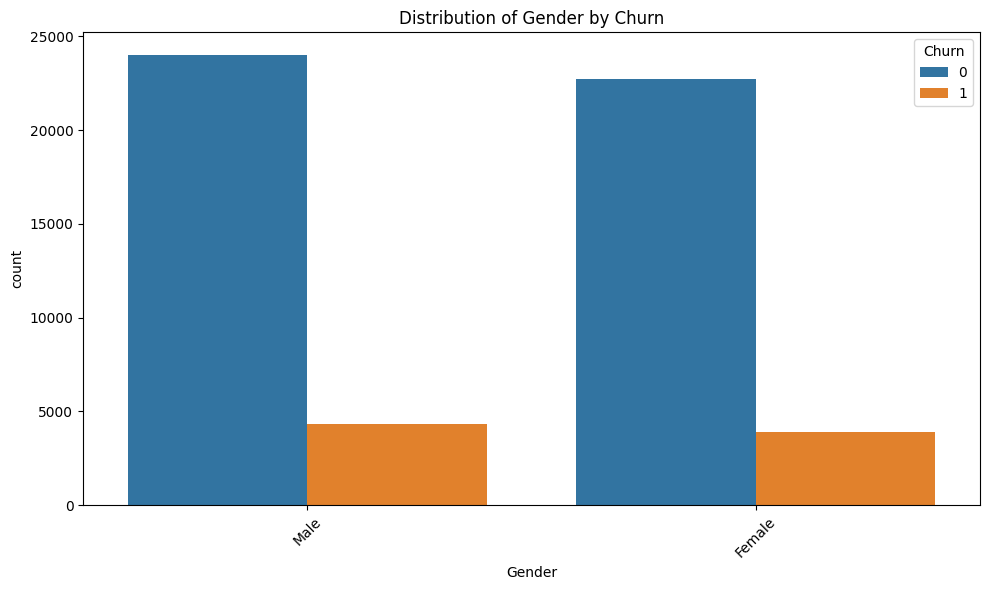

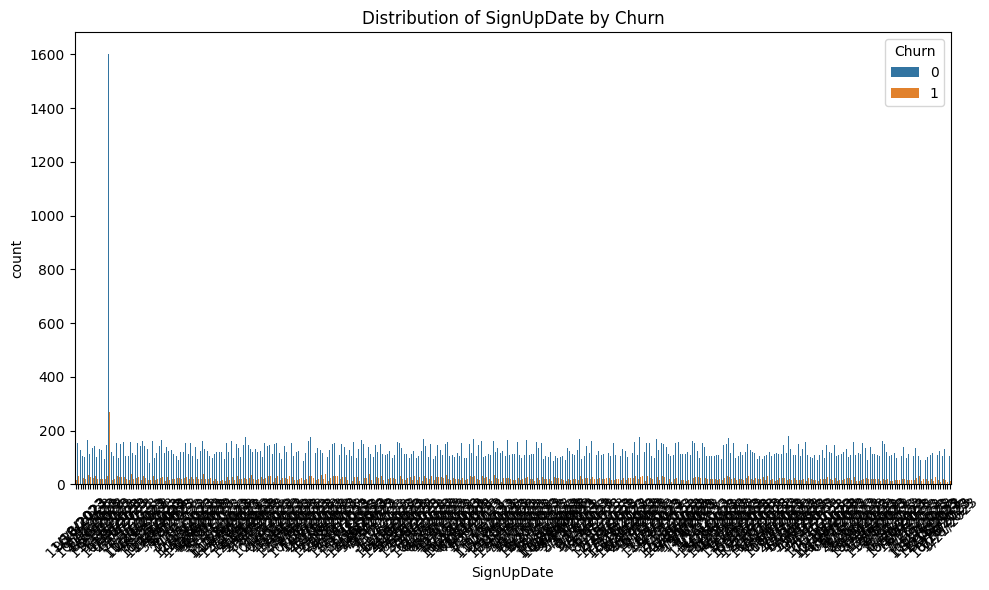

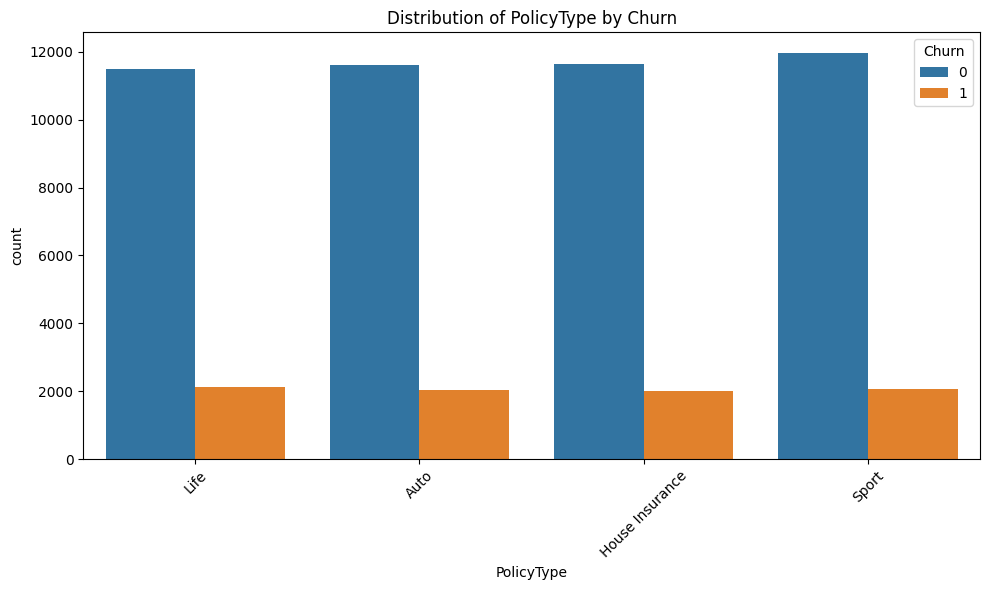

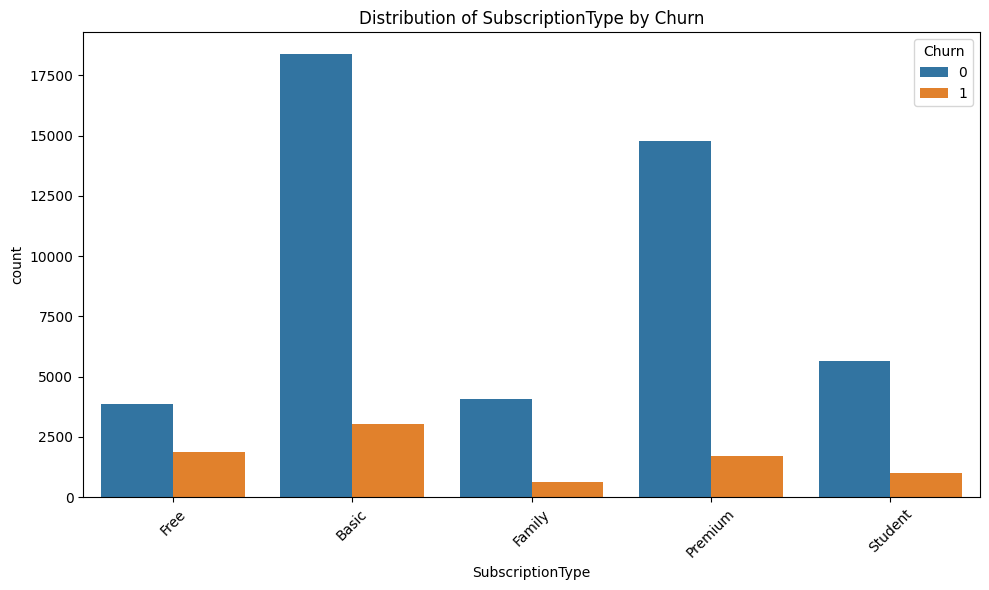

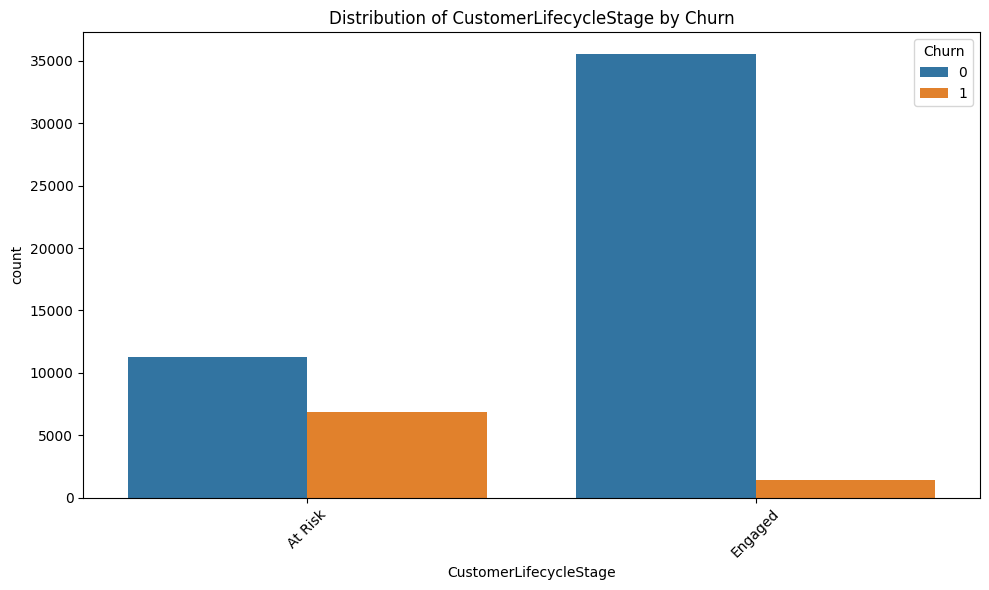

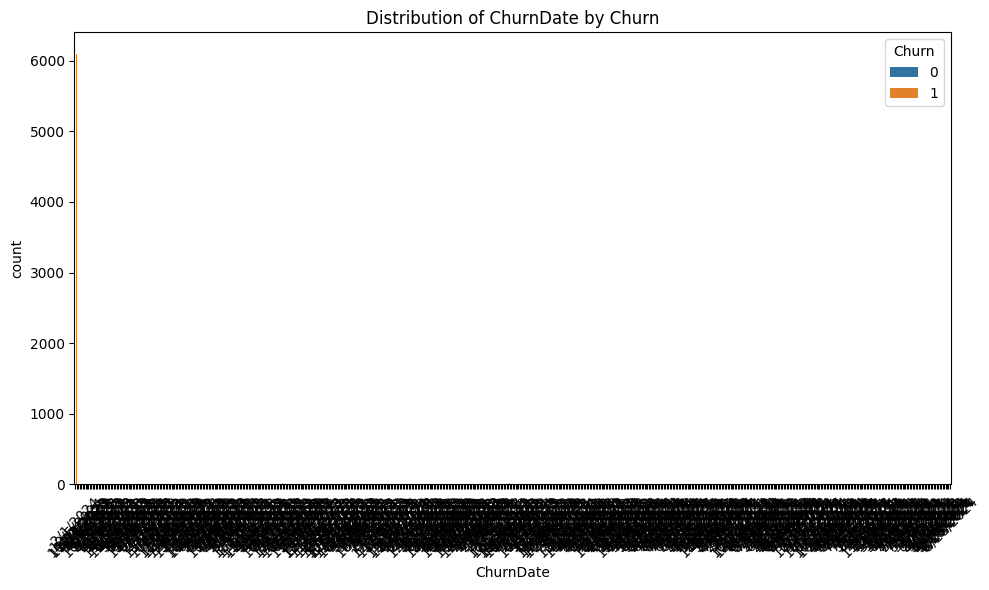

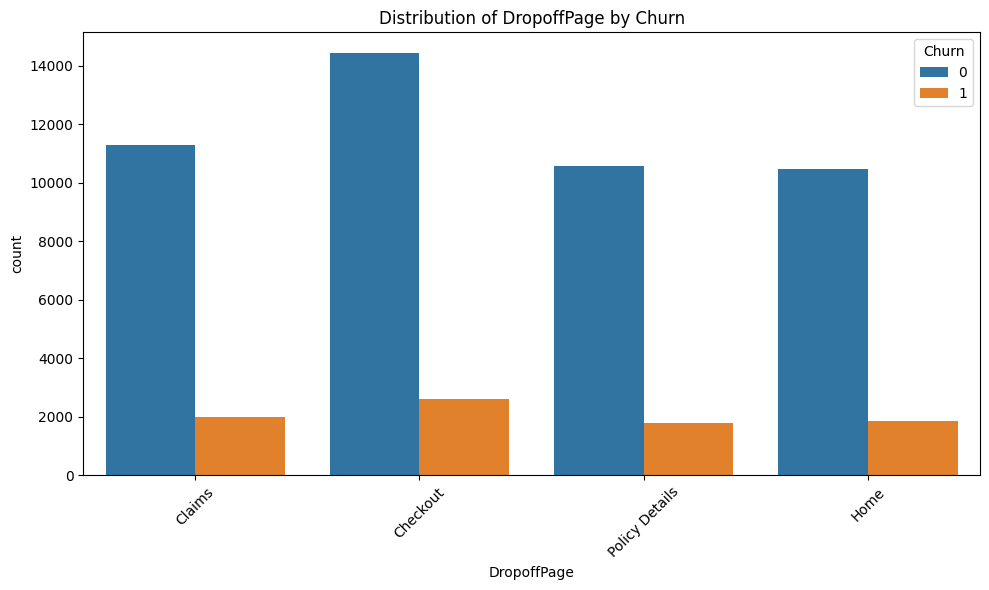

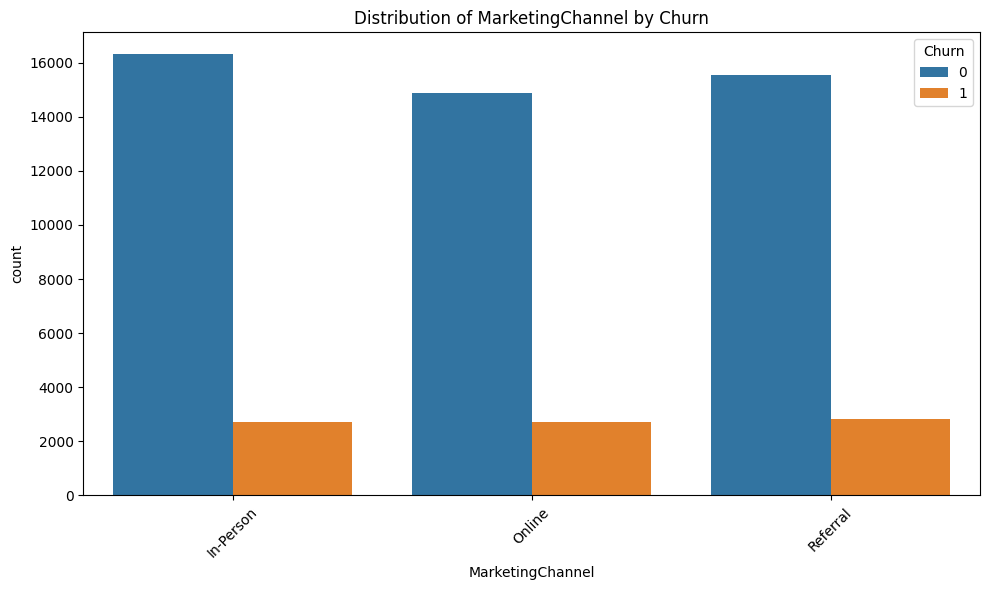

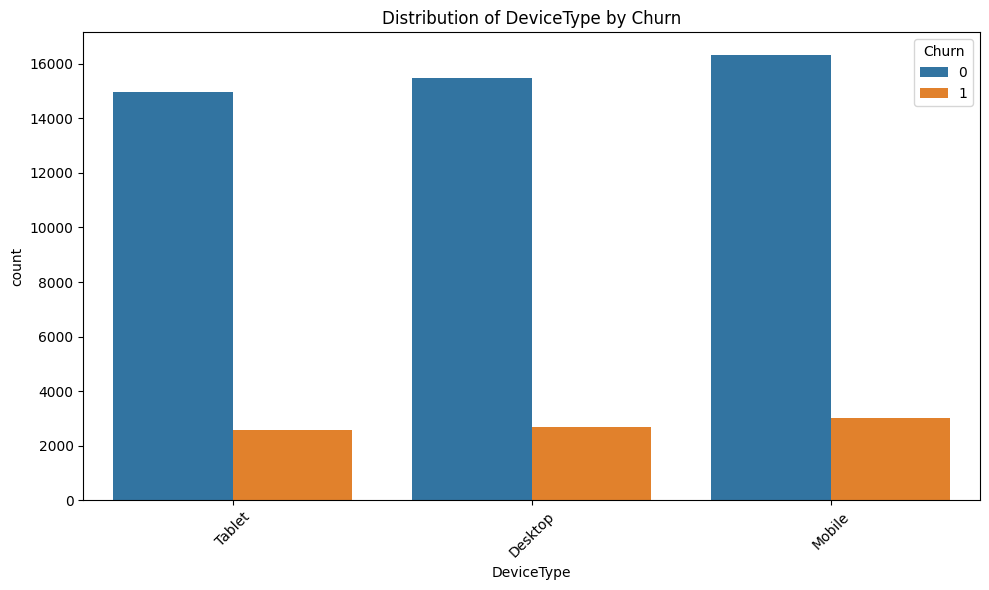

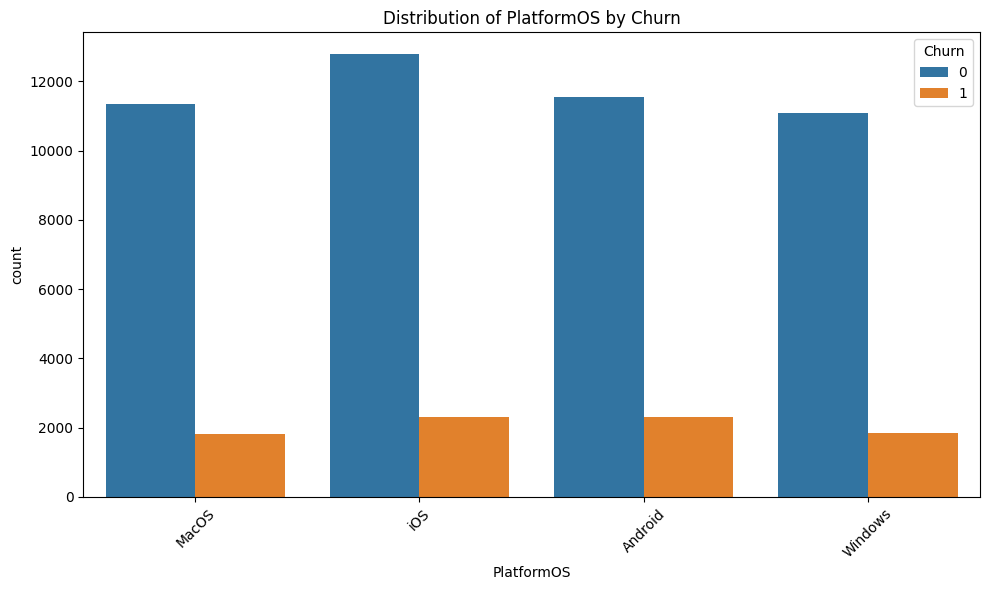

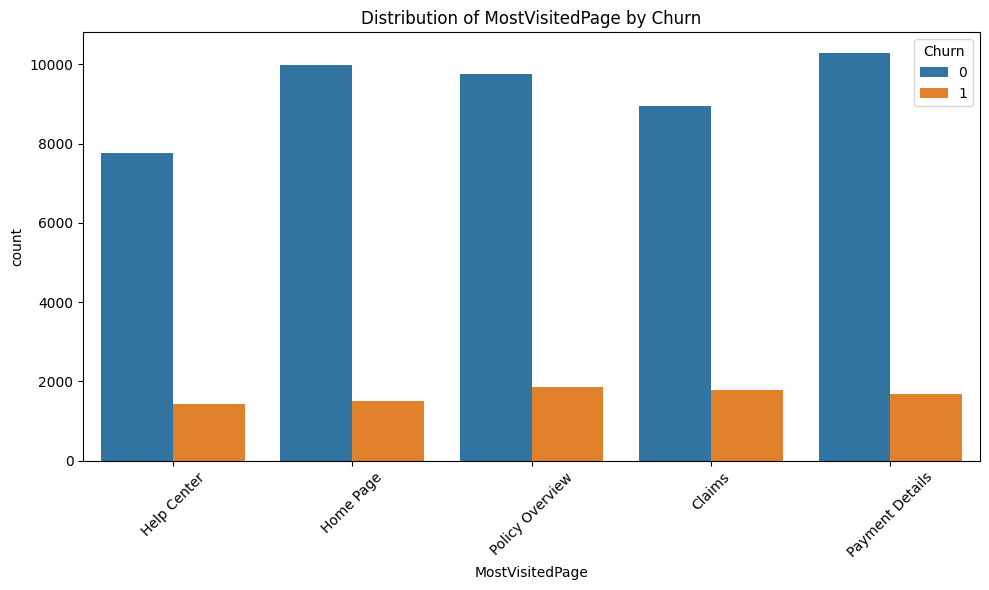

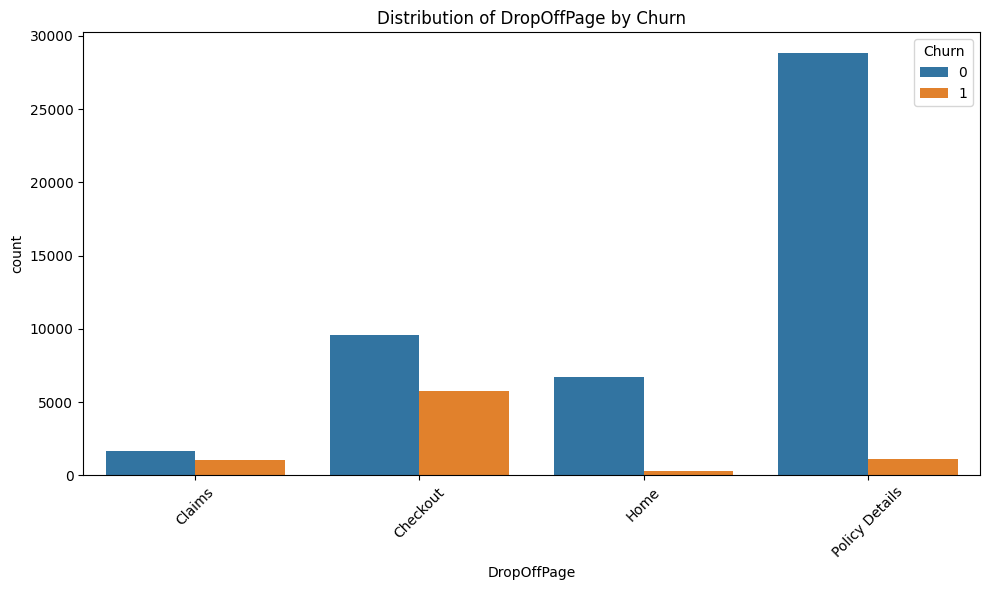

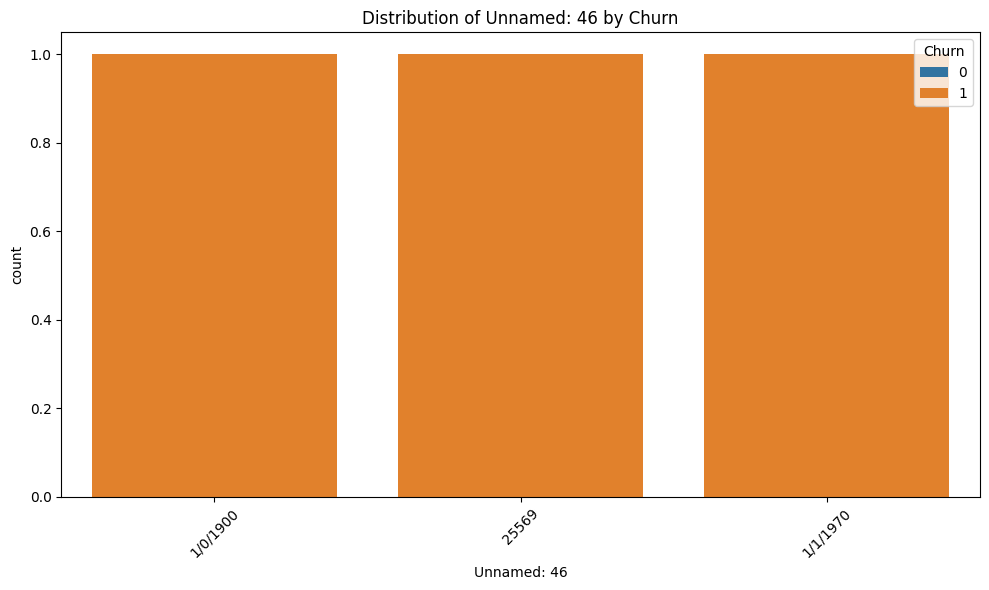

In [11]:
def categorical_analysis():
    # Analyze non-numerical columns
    def analyze_categorical_data(data, target_column='Churn'):
        categorical_columns = data.select_dtypes(include=['object', 'category']).columns
        results = []

        for column in categorical_columns:
            if column != target_column:
                contingency_table = pd.crosstab(data[column], data[target_column])
                chi2, p_value, _, _ = chi2_contingency(contingency_table)

                results.append({
                    'Feature': column,
                    'Chi-Square Statistic': chi2,
                    'p-value': p_value
                })

        results_df = pd.DataFrame(results).sort_values(by='p-value')
        return results_df

    # Visualize the distribution of categorical variables
    def visualize_categorical_distributions(data, categorical_columns, target_column='Churn'):
        for column in categorical_columns:
            if column != target_column:
                plt.figure(figsize=(10, 6))
                sns.countplot(data=data, x=column, hue=target_column)
                plt.title(f"Distribution of {column} by {target_column}")
                plt.xticks(rotation=45)
                plt.tight_layout()
                plt.show()

    # Identify non-numerical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # Perform Chi-Square Test for Categorical Variables
    test_results = analyze_categorical_data(data)
    print("Chi-Square Test Results for Categorical Variables:\n")
    print(test_results)

    # Visualize distributions of categorical variables
    visualize_categorical_distributions(data, categorical_columns)
    # code descriptions done with chatgpt (ChatGPT, 2024)
categorical_analysis()


In [13]:
def customer_personas3():
    # Step 2: Identify numerical and categorical columns
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

    # Step 3: Handle missing values
    data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

    # Step 4: Add 'Churn' as a feature to influence clustering
    data['Churn_Weighted'] = data['Churn'] * 10  # Amplify churn signal for clustering
    if 'Churn_Weighted' not in numerical_columns:
        numerical_columns.append('Churn_Weighted')

    # Step 5: Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numerical_columns])

    # Step 6: Evaluate clustering quality
    def evaluate_clusters(data, scaled_data, k_range=(3, 6)):
        print("\nEvaluating Clustering Quality:")
        for k in range(k_range[0], k_range[1] + 1):
            kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
            clusters = kmeans.fit_predict(scaled_data)
            score = silhouette_score(scaled_data, clusters)
            print(f"Number of Clusters: {k}, Silhouette Score: {score:.3f}")

    evaluate_clusters(data, scaled_data)

    # Step 7: Apply KMeans with adjusted clusters
    optimal_clusters = 5  # Adjust this based on silhouette scores
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(scaled_data)

    # Step 8: Assign customer personas
    persona_mapping = {
        0: "Engaged Advocates",
        1: "At-Risk Users - Likely to Churn or Churned",
        2: "Low Engagement Users",
        3: "Low Engagement Users",
        4: "Low Engagement Users"
    }
    data['Customer_Persona'] = data['Cluster'].map(persona_mapping)

    # Step 9: Add subgroups for churned/non-churned
    data['Persona_Subgroup'] = data['Customer_Persona'] + " - " + data['Churn'].map({1: "", 0: ""})

    # Step 10: Check balance of personas
    print("\nCustomer Persona Subgroup Counts:")
    print(data['Persona_Subgroup'].value_counts())

    # Step 11: Visualize clusters using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)
    data['PCA1'] = reduced_data[:, 0]
    data['PCA2'] = reduced_data[:, 1]

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='PCA1', y='PCA2', hue='Persona_Subgroup', data=data, palette='tab10', s=100
    )
    plt.title('Balanced Customer Personas with Churn Subgroups Visualized Using PCA')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Persona Subgroups')
    plt.show()

    # Step 12: Save the updated dataset
    data.to_csv('balanced_customer_personas.csv', index=False)
    print("\nUpdated dataset saved to 'balanced_customer_personas.csv'.")

customer_personas3()

# THE CODE COULD NOT BE GENERATED ON THE GOOGLE COLLAB DUE TO COLLAB LIMITATIONS IN LIBRARIES, HOWEVER, THE SAME CODE WAS USED ON PYCHARM TO GENERATE CUSTOMER CLUSTER TABLE

Error: scaled_data still contains NaN values.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


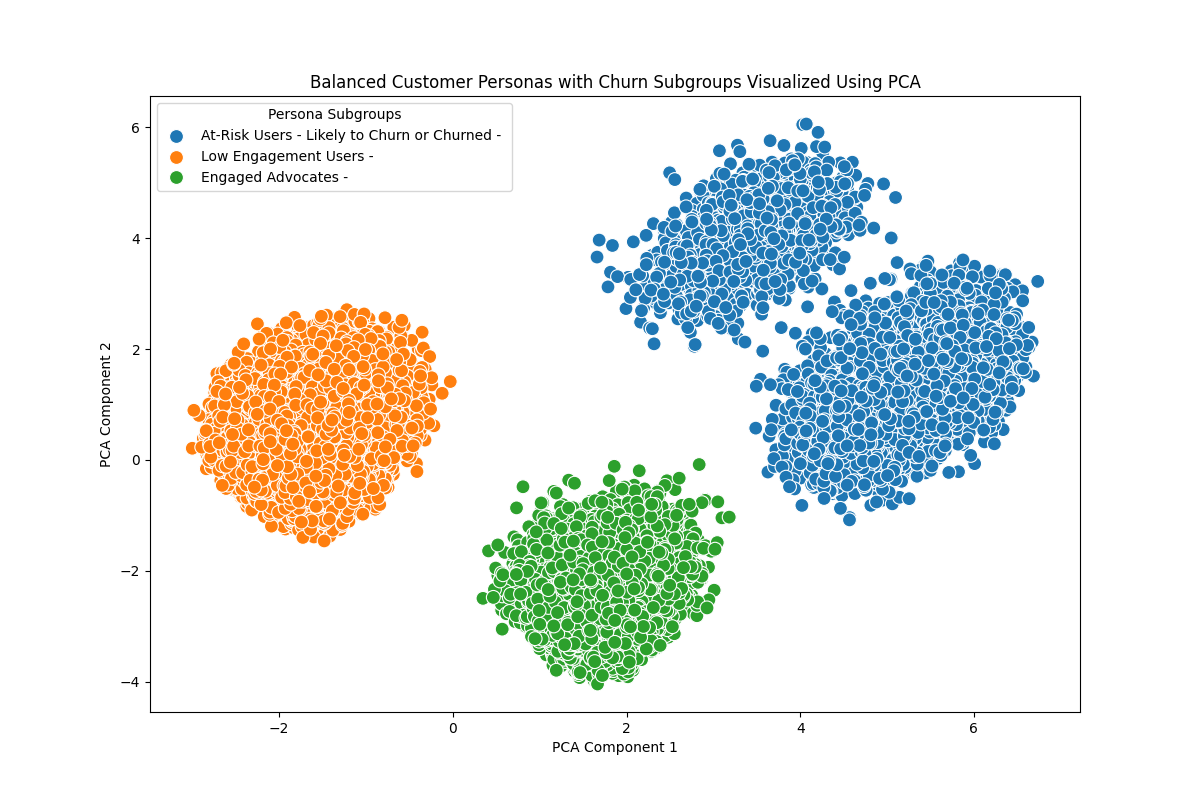